In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-sales/house_sales_data.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# <font color='blue'> 1. Read dataset and perform necessary data cleaning

In [3]:
df=pd.read_csv('../input/house-sales/house_sales_data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Drop the ID column
df=df.drop(['Id'], axis=1)

# <font color='blue'>2. Split the data into train/test using 80:20 proportion

In [5]:
#seperating independent and dependent variables
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
x.shape, y.shape

((1460, 79), (1460,))

In [6]:
# Importing the train test split function
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size=0.2 ,random_state = 56)

In [7]:
for i in [train_x,test_x,train_y,test_y]:
    print(i.shape)

(1168, 79)
(292, 79)
(1168,)
(292,)


# <font color='blue'> 3. Perform pre-processing and EDA on the train data

**Identify Categorical Data and Numerical Data**

Numerical Variables

In [8]:
# find numerical variables
numerical = [var for var in train_x.columns if train_x[var].dtype!='O']
print(numerical)
print('There are {} numerical variables'.format(len(numerical)))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
There are 36 numerical variables


In [9]:
for var in numerical:
    print(var, " => unique count =",len(train_x[var].unique()))

MSSubClass  => unique count = 15
LotFrontage  => unique count = 105
LotArea  => unique count = 883
OverallQual  => unique count = 10
OverallCond  => unique count = 9
YearBuilt  => unique count = 108
YearRemodAdd  => unique count = 61
MasVnrArea  => unique count = 283
BsmtFinSF1  => unique count = 545
BsmtFinSF2  => unique count = 126
BsmtUnfSF  => unique count = 676
TotalBsmtSF  => unique count = 630
1stFlrSF  => unique count = 656
2ndFlrSF  => unique count = 354
LowQualFinSF  => unique count = 21
GrLivArea  => unique count = 747
BsmtFullBath  => unique count = 4
BsmtHalfBath  => unique count = 3
FullBath  => unique count = 4
HalfBath  => unique count = 3
BedroomAbvGr  => unique count = 8
KitchenAbvGr  => unique count = 2
TotRmsAbvGrd  => unique count = 12
Fireplaces  => unique count = 4
GarageYrBlt  => unique count = 98
GarageCars  => unique count = 5
GarageArea  => unique count = 388
WoodDeckSF  => unique count = 235
OpenPorchSF  => unique count = 184
EnclosedPorch  => unique count =

Discrete Variable

In [10]:
discrete = []
for var in numerical:
    if len(train_x[var].unique())<20:
        discrete.append(var)
        print(var , ' is discrete with unique count ' , len(train_x[var].unique()), ' => ', train_x[var].unique())
        
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  is discrete with unique count  15  =>  [ 75 190  20  60  70  30 160  90  80  45  50 120  40  85 180]
OverallQual  is discrete with unique count  10  =>  [10  5  9  7  2  8  6  3  4  1]
OverallCond  is discrete with unique count  9  =>  [9 5 6 3 2 8 4 7 1]
BsmtFullBath  is discrete with unique count  4  =>  [0 1 2 3]
BsmtHalfBath  is discrete with unique count  3  =>  [0 1 2]
FullBath  is discrete with unique count  4  =>  [3 1 2 0]
HalfBath  is discrete with unique count  3  =>  [1 0 2]
BedroomAbvGr  is discrete with unique count  8  =>  [3 2 1 4 6 5 8 0]
KitchenAbvGr  is discrete with unique count  2  =>  [1 2]
TotRmsAbvGrd  is discrete with unique count  12  =>  [ 9  5  8  7  4 11  6 10 14  3 12  2]
Fireplaces  is discrete with unique count  4  =>  [1 2 0 3]
GarageCars  is discrete with unique count  5  =>  [2 1 3 0 4]
3SsnPorch  is discrete with unique count  18  =>  [  0 216 508 238 144  23 180 245 168 140  96 304 290 130 182 162 196 407]
PoolArea  is discrete with uniq

Continuous Variables

In [11]:
# Identify continuous variables
continuous = [var for var in numerical if var not in discrete]
print('There are {} continuous variables'.format(len(continuous)))
continuous

There are 19 continuous variables


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [12]:
# Find Categorical Variables
categorical = [var for var in train_x.columns if train_x[var].dtype=='O']
print(categorical)
print('There are {} categorical variables'.format(len(categorical)))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
There are 43 categorical variables


In [13]:
for var in categorical:
    print(var, " => unique count =",len(train_x[var].unique())," => unique set = ", train_x[var].unique(), "\n")

MSZoning  => unique count = 5  => unique set =  ['RM' 'RL' 'C (all)' 'FV' 'RH'] 

Street  => unique count = 2  => unique set =  ['Pave' 'Grvl'] 

Alley  => unique count = 3  => unique set =  [nan 'Grvl' 'Pave'] 

LotShape  => unique count = 4  => unique set =  ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour  => unique count = 4  => unique set =  ['Lvl' 'Low' 'Bnk' 'HLS'] 

Utilities  => unique count = 2  => unique set =  ['AllPub' 'NoSeWa'] 

LotConfig  => unique count = 5  => unique set =  ['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3'] 

LandSlope  => unique count = 3  => unique set =  ['Gtl' 'Sev' 'Mod'] 

Neighborhood  => unique count = 25  => unique set =  ['OldTown' 'Crawfor' 'Somerst' 'NWAmes' 'ClearCr' 'Mitchel' 'IDOTRR'
 'StoneBr' 'CollgCr' 'Edwards' 'Gilbert' 'NoRidge' 'NAmes' 'Sawyer'
 'BrkSide' 'Timber' 'SawyerW' 'NridgHt' 'SWISU' 'NPkVill' 'BrDale'
 'MeadowV' 'Veenker' 'Blmngtn' 'Blueste'] 

Condition1  => unique count = 9  => unique set =  ['Artery' 'Norm' 'RRNn' 'Feedr' 'RRAe' 'PosN' 

Descriptive Statistics

In [14]:
train_x.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1168.00000,1168,963.000000,1168.000000,1168,78,1168,1168,1168,1168,...,1168.000000,1168.000000,5,229,42,1168.000000,1168.000000,1168.000000,1168,1168
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Fa,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,920,NaN,NaN,1163,43,734,1050,1167,845,...,NaN,NaN,2,127,37,NaN,NaN,NaN,1023,969
mean,56.19863,NaN,69.991693,10349.212329,NaN,NaN,NaN,NaN,NaN,NaN,...,15.392979,2.562500,NaN,NaN,NaN,49.155822,6.297089,2007.814212,NaN,NaN
std,41.90588,NaN,23.326525,7716.469591,NaN,NaN,NaN,NaN,NaN,NaN,...,56.850189,39.492924,NaN,NaN,NaN,552.100518,2.694040,1.325604,NaN,NaN
min,20.00000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.00000,NaN,59.000000,7583.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN
50%,50.00000,NaN,69.000000,9491.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.00000,NaN,80.000000,11604.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [15]:
for var in categorical:
    print(var, "=> unique count =",len(train_x[var].unique()), "\n--------------------------\n", train_x[var].value_counts())

MSZoning => unique count = 5 
--------------------------
 RL         920
RM         178
FV          51
RH          11
C (all)      8
Name: MSZoning, dtype: int64
Street => unique count = 2 
--------------------------
 Pave    1163
Grvl       5
Name: Street, dtype: int64
Alley => unique count = 3 
--------------------------
 Grvl    43
Pave    35
Name: Alley, dtype: int64
LotShape => unique count = 4 
--------------------------
 Reg    734
IR1    395
IR2     32
IR3      7
Name: LotShape, dtype: int64
LandContour => unique count = 4 
--------------------------
 Lvl    1050
Bnk      54
HLS      40
Low      24
Name: LandContour, dtype: int64
Utilities => unique count = 2 
--------------------------
 AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig => unique count = 5 
--------------------------
 Inside     845
Corner     208
CulDSac     76
FR2         37
FR3          2
Name: LotConfig, dtype: int64
LandSlope => unique count = 3 
--------------------------
 Gtl    1108


In [16]:
corrMatrix = train_x.corr()
corrMatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.382134,-0.206964,0.040136,-0.069287,0.018471,0.029060,-0.001228,-0.076020,-0.066796,...,-0.096222,-0.031997,0.006442,-0.012558,-0.054879,-0.018562,0.010054,-0.009556,-0.005168,-0.016427
LotFrontage,-0.382134,1.000000,0.465558,0.222447,-0.066565,0.120276,0.099515,0.182588,0.122462,0.049639,...,0.305843,0.075178,0.116571,0.032807,0.082606,0.041341,0.082038,0.002915,0.021152,-0.012992
LotArea,-0.206964,0.465558,1.000000,0.131702,0.018160,0.016770,0.062218,0.140640,0.161831,0.063683,...,0.197452,0.184013,0.114927,-0.005750,0.033548,0.079070,0.049194,0.035591,0.002817,-0.039161
OverallQual,0.040136,0.222447,0.131702,1.000000,-0.075881,0.571689,0.556405,0.398643,0.203970,-0.060223,...,0.561172,0.232394,0.299660,-0.098224,0.040358,0.067275,0.020995,-0.031123,0.066133,-0.038331
OverallCond,-0.069287,-0.066565,0.018160,-0.075881,1.000000,-0.373043,0.082370,-0.106528,-0.034045,0.039156,...,-0.127394,-0.007567,-0.007272,0.055357,0.030046,0.075811,0.008159,0.070819,0.002140,0.042794
YearBuilt,0.018471,0.120276,0.016770,0.571689,-0.373043,1.000000,0.596489,0.301318,0.249678,-0.051810,...,0.456530,0.198124,0.185988,-0.396080,0.034269,-0.059393,-0.015073,-0.035044,0.034248,-0.009876
YearRemodAdd,0.029060,0.099515,0.062218,0.556405,0.082370,0.596489,1.000000,0.169894,0.131397,-0.063783,...,0.381989,0.192176,0.238805,-0.197306,0.053758,-0.029673,-0.009357,-0.006842,0.047773,0.033805
MasVnrArea,-0.001228,0.182588,0.140640,0.398643,-0.106528,0.301318,0.169894,1.000000,0.257490,-0.072347,...,0.359518,0.141541,0.115937,-0.105032,0.032740,0.076640,-0.016493,-0.026997,-0.023594,-0.012383
BsmtFinSF1,-0.076020,0.122462,0.161831,0.203970,-0.034045,0.249678,0.131397,0.257490,1.000000,-0.071088,...,0.252774,0.188494,0.079780,-0.113102,0.021380,0.072323,0.018918,0.004279,-0.004351,0.013370
BsmtFinSF2,-0.066796,0.049639,0.063683,-0.060223,0.039156,-0.051810,-0.063783,-0.072347,-0.071088,1.000000,...,-0.020453,0.051473,0.018302,0.057029,-0.031356,0.086474,0.056825,0.005427,-0.013535,0.035781


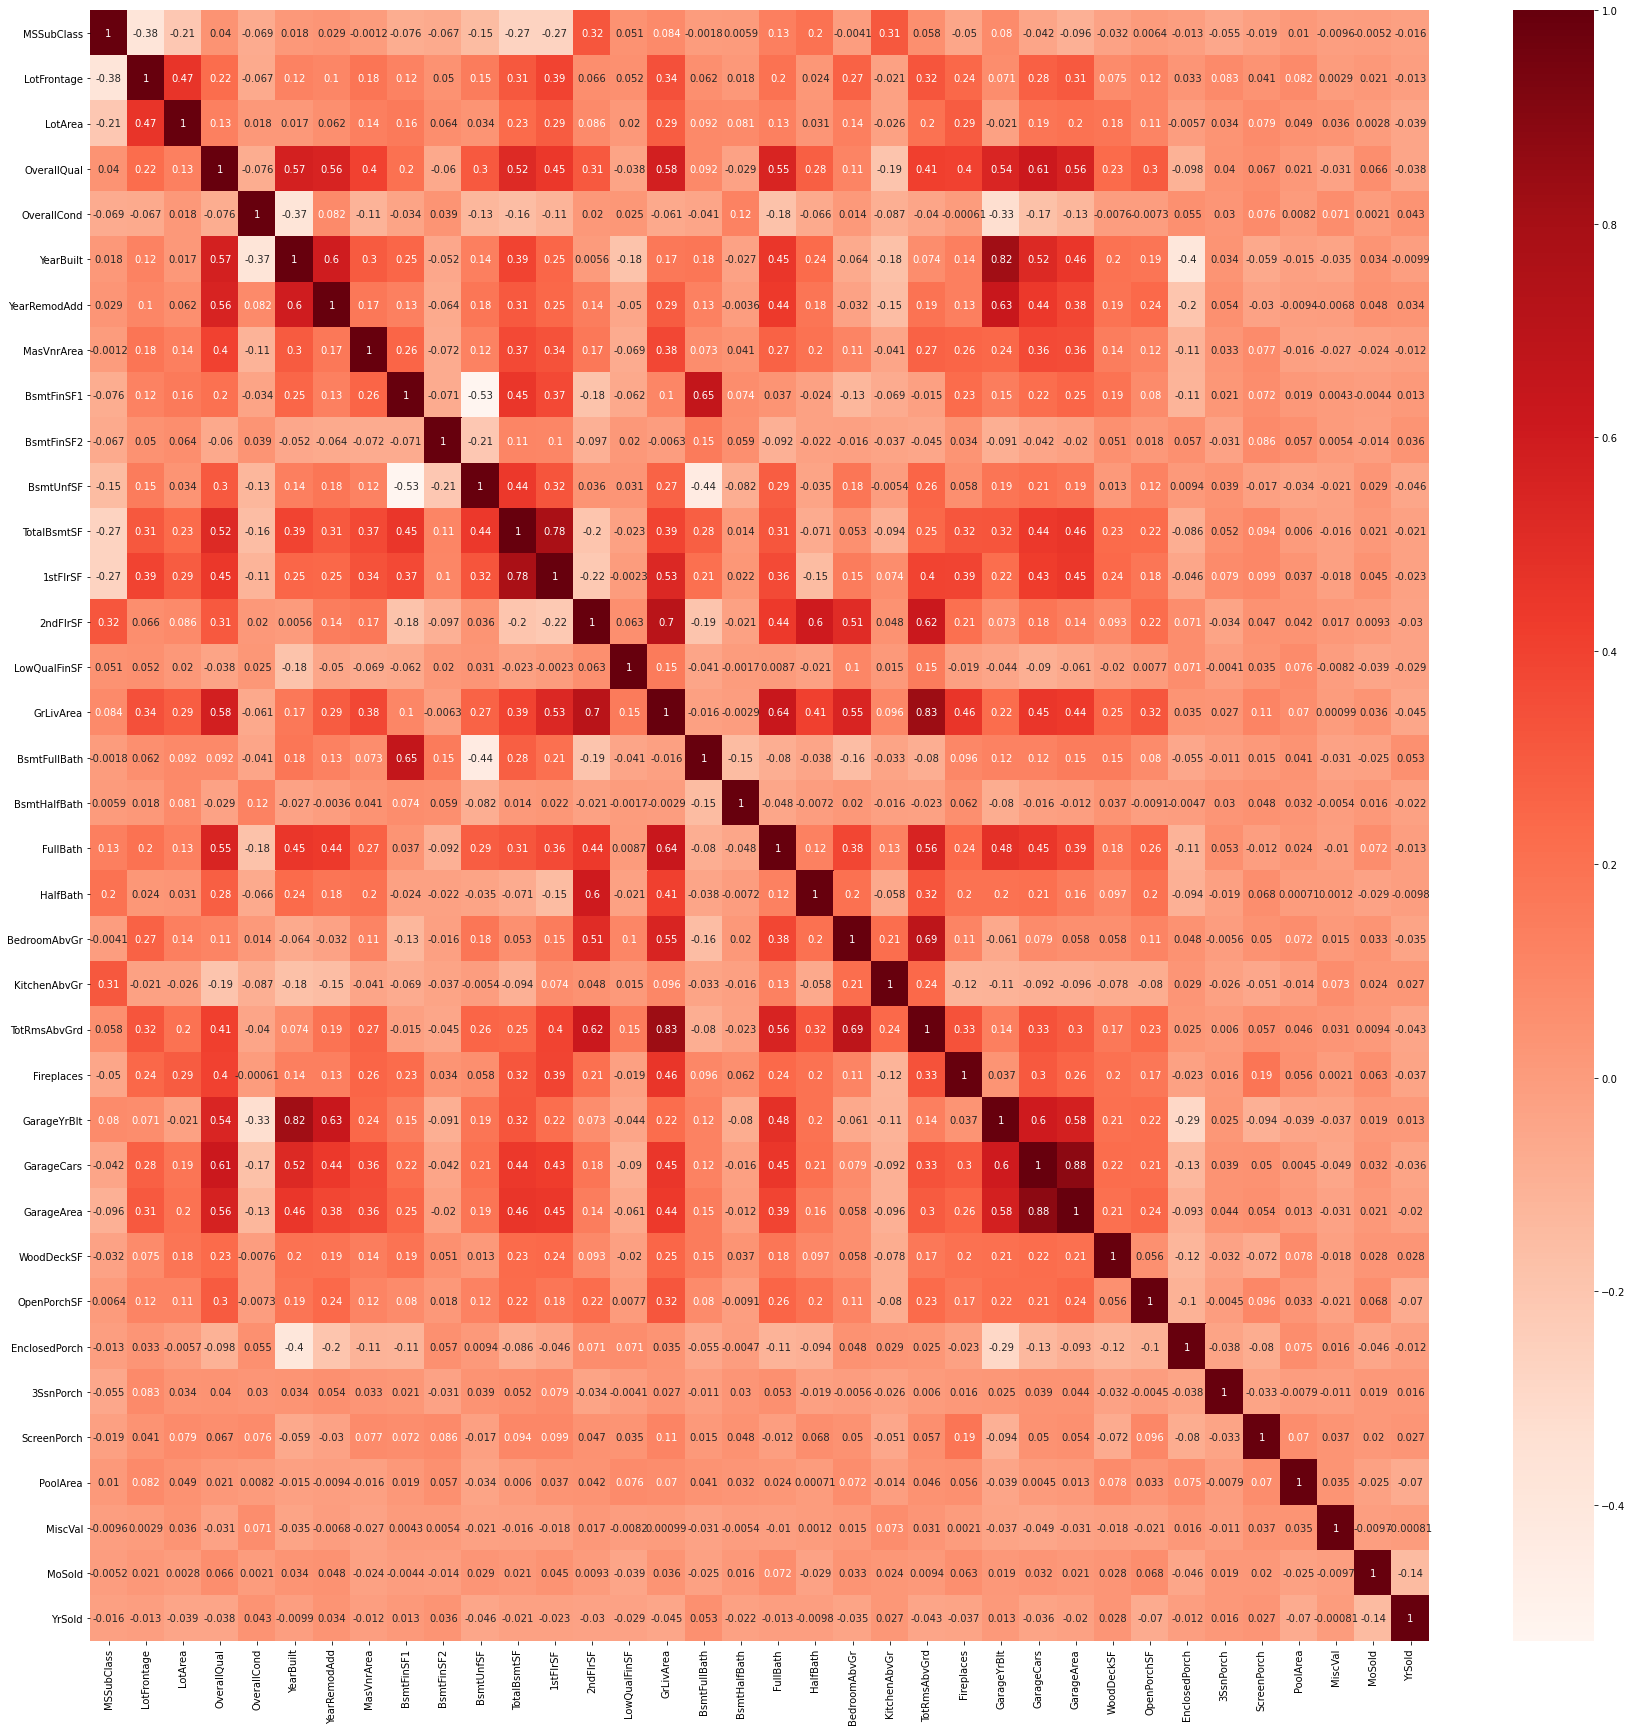

In [17]:
#plot heat map
plt.figure(figsize=(30,30))
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

Drop th column with high correlation

In [18]:
corr_col= corrMatrix[(corrMatrix.abs()>0.7) & (corrMatrix.abs()!=1)].count()
corr_col=pd.DataFrame(data=corr_col)
corr_col=corr_col[corr_col[0]>0].index.tolist()
train_x[corr_col].corr()

,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
YearBuilt,1.000000,0.391736,0.254039,0.005559,0.168451,0.073547,0.816049,0.524104,0.456530
TotalBsmtSF,0.391736,1.000000,0.783924,-0.195296,0.393790,0.246221,0.323950,0.440406,0.461230
1stFlrSF,0.254039,0.783924,1.000000,-0.216880,0.532668,0.397033,0.218243,0.426215,0.447594
2ndFlrSF,0.005559,-0.195296,-0.216880,1.000000,0.704663,0.622503,0.073294,0.184713,0.142737
GrLivArea,0.168451,0.393790,0.532668,0.704663,1.000000,0.832023,0.219126,0.454606,0.437096
TotRmsAbvGrd,0.073547,0.246221,0.397033,0.622503,0.832023,1.000000,0.136816,0.332856,0.299286
GarageYrBlt,0.816049,0.323950,0.218243,0.073294,0.219126,0.136816,1.000000,0.602714,0.575080
GarageCars,0.524104,0.440406,0.426215,0.184713,0.454606,0.332856,0.602714,1.000000,0.881476
GarageArea,0.456530,0.461230,0.447594,0.142737,0.437096,0.299286,0.575080,0.881476,1.000000


Only keep one of the variable among the variables that have high intercorrelation.
* YearBuilt - GarageYrBlt
* TotalBsmtSF - 1stFlrSF
* 2ndFlrSF - GrLivArea
* TotRmsAbvGrd	- GrLivArea
* GarageCars - GarageArea

Drop:
* GarageYrBlt
* TotalBsmtSF
* 2ndFlrSF
* TotRmsAbvGrd
* GarageCars

In [19]:
train_x.drop(['GarageYrBlt', 'TotalBsmtSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
# op_feature = corrMatrix.index[abs(corrMatrix['SalePrice']>0.5)]
# plt.subplots(figsize=(12, 8))
# top_corr = data[top_feature].corr()
# sns.heatmap(top_corr, annot=True)
# plt.show()

**Identify and Handel Missing Value**

In [21]:
Missing_Val_Col=[]
for i in train_x.columns:
    Null_Sum=train_x[i].isnull().sum()
    Null_Per=Null_Sum/1168
    if Null_Sum!=0:
        print(i, Null_Sum, Null_Per)
        if Null_Per >0.4:
            Missing_Val_Col.append(i)
            
Missing_Val_Col

LotFrontage 205 0.175513698630137
Alley 1090 0.9332191780821918
MasVnrType 6 0.005136986301369863
MasVnrArea 6 0.005136986301369863
BsmtQual 28 0.023972602739726026
BsmtCond 28 0.023972602739726026
BsmtExposure 29 0.02482876712328767
BsmtFinType1 28 0.023972602739726026
BsmtFinType2 29 0.02482876712328767
Electrical 1 0.0008561643835616438
FireplaceQu 552 0.4726027397260274
GarageType 61 0.052226027397260275
GarageFinish 61 0.052226027397260275
GarageQual 61 0.052226027397260275
GarageCond 61 0.052226027397260275
PoolQC 1163 0.9957191780821918
Fence 939 0.8039383561643836
MiscFeature 1126 0.964041095890411


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [22]:
for i in Missing_Val_Col:
    print(i)
    print(df[i].value_counts())

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
PoolQC
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [23]:
train_x=train_x.drop(Missing_Val_Col, axis=1)

In [24]:
train_x.shape

(1168, 69)

In [25]:
numerical = [var for var in train_x.columns if train_x[var].dtype!='O']
print(numerical)
print('There are {} numerical variables'.format(len(numerical)))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
There are 31 numerical variables


In [26]:
categorical = [var for var in train_x.columns if train_x[var].dtype=='O']
print(categorical)
print('There are {} categorical variables'.format(len(categorical)))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
There are 38 categorical variables


In [27]:
for col in numerical:
    if train_x[col].isnull().sum()>0:
        train_x[col].replace(np.nan, train_x[col].median(), inplace=True)
train_x[numerical].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
1stFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [28]:
Cat_Missing=[]
for col in categorical:
    if col in Missing_Val_Col:
        continue
    if train_x[col].isnull().sum()>0:
        Cat_Missing.append(col)
        
train_x[Cat_Missing]

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
583,None,TA,TA,No,Unf,Unf,SBrkr,Detchd,Unf,Gd,TA
300,BrkFace,TA,TA,Mn,BLQ,Unf,SBrkr,Attchd,Unf,TA,TA
932,Stone,Ex,Gd,No,Unf,Unf,SBrkr,Attchd,Fin,TA,TA
1409,BrkFace,Gd,TA,No,Unf,Unf,SBrkr,Attchd,Fin,TA,TA
828,None,TA,Gd,Gd,LwQ,ALQ,SBrkr,Attchd,Fin,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
1259,None,Gd,TA,No,ALQ,LwQ,SBrkr,Attchd,Unf,TA,TA
1442,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,Fin,TA,TA
1216,None,NaN,NaN,NaN,NaN,NaN,SBrkr,Attchd,Unf,TA,TA
399,Stone,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,Fin,TA,TA


In [29]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_x[col] = train_x[col].fillna('Missing')

In [30]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType'):
    train_x[col] = train_x[col].fillna('Missing')

In [31]:
train_x['Electrical']=train_x['Electrical'].fillna(train_x['Electrical'].mode()[0])

In [32]:
train_x.isnull().sum().sum()

0

**Variable Transformations, Binning, Normalization, Scaling**

Correcting Data Type

In [33]:
train_x['MSSubClass'] = train_x['MSSubClass'].astype('object')

In [34]:
# find numerical variables
numerical = [var for var in train_x.columns if train_x[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# find categorical variables
categorical = [var for var in train_x.columns if train_x[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 30 numerical variables
There are 39 categorical variables


Temporal Variables

In [35]:
import datetime
now = datetime.datetime.now()
# Of above YearBuilt - can be marked and transformed in categorical as this can be grouped in buckets
train_x['YearBuiltAgo'] = now.year - train_x['YearBuilt']
train_x['YearBuiltAgo'].unique()

array([128,  68,  15,  35,  54,  30,  72,  16,  11,  12,  23,  24,  89,
        55, 107,  17,  26, 129,  56,  14, 111,  58,  90,  43,  61,  53,
        97,  71, 101,  41,  60, 113,  62,  22,  57,  64,  66,  45,  96,
        44,  21, 106,  80,  49, 103,  31,  86,  87,  91, 109,  65,  73,
        19,  67,  98,  52,  46,  51,  27,  29,  47,  37,  13,  63, 121,
        39, 146,  50,  82,  84,  76,  59,  85,  18,  28,  48,  25,  94,
        99, 105,  42,  81,  20,  40,  33,  93,  69,  79, 116, 117,  70,
       102,  74,  38,  95,  36, 136, 141,  92,  34,  83, 131,  75,  32,
       100, 110, 104, 115])

Scaling, Standardization, Normalizarion

Dependent Variables

In [36]:
train_y.describe()

count      1168.000000
mean     180132.732021
std       77214.748869
min       35311.000000
25%      129800.000000
50%      163000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

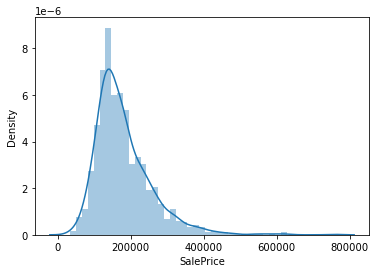

In [37]:
sns.distplot(train_y)

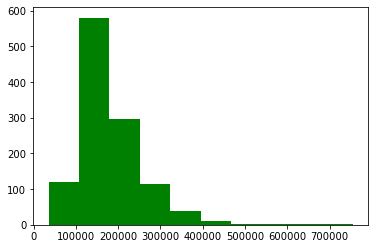

In [38]:
plt.hist(train_y, color='green')
plt.show()

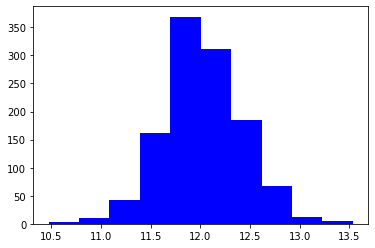

In [39]:
# Normalizing the target variable
train_y = np.log(train_y)
plt.hist(train_y, color='blue')
plt.show()

Transform Nuemrical Variables

In [40]:
for col in numerical:
    train_x[col]=(train_x[col]-train_x[col].min())/(train_x[col].max()-train_x[col].min())
    
train_x[numerical]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
583,0.184932,0.077362,1.000000,1.000,0.133333,0.833333,0.000000,0.000000,0.000000,0.574547,...,0.633094,0.122520,0.917733,0.0,0.0,0.000000,0.0,0.0,0.545455,0.50
300,0.236301,0.091630,0.444444,0.500,0.577778,0.050000,0.035000,0.384369,0.000000,0.150488,...,0.269784,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.454545,0.00
932,0.215753,0.065758,0.888889,0.500,0.970370,0.933333,0.188750,0.000000,0.000000,0.884812,...,0.566906,0.000000,0.349177,0.0,0.0,0.000000,0.0,0.0,0.181818,0.25
1409,0.085616,0.122029,0.666667,0.625,0.822222,0.683333,0.076875,0.000000,0.000000,0.367394,...,0.389928,0.424737,0.115174,0.0,0.0,0.000000,0.0,0.0,0.909091,0.50
828,0.164384,0.173735,0.444444,0.500,0.681481,0.283333,0.000000,0.113803,0.518318,0.000000,...,0.387050,0.567095,0.000000,0.0,0.0,0.468750,0.0,0.0,0.454545,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.150685,0.053583,0.555556,0.875,0.696296,0.316667,0.000000,0.275137,0.297151,0.006503,...,0.330935,0.210035,0.000000,0.0,0.0,0.166667,0.0,0.0,0.545455,0.50
1442,0.219178,0.061528,1.000000,0.500,0.985185,0.966667,0.100000,0.349634,0.000000,0.117046,...,0.584173,0.196033,0.095064,0.0,0.0,0.000000,0.0,0.0,0.272727,0.75
1216,0.160959,0.048383,0.555556,0.500,0.762963,0.466667,0.000000,0.000000,0.000000,0.000000,...,0.387770,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.272727,1.00
399,0.150685,0.043278,0.666667,0.500,0.970370,0.950000,0.062500,0.371115,0.000000,0.130051,...,0.315108,0.000000,0.307130,0.0,0.0,0.000000,0.0,0.0,0.818182,0.75


Transform Categorical Variables (One Hot Encoded)

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_enc = train_x[categorical].copy()
train_x = train_x.drop(categorical, axis = 1)

for cols in categorical:
    X_enc[cols] = le.fit_transform(X_enc[cols])
X_enc.head()

train_x = pd.concat([train_x, X_enc], axis = 1)

# <font color='blue'> 4. Use feature selection techniques like correlation analysis / embedded method to identify the important features

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:31:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


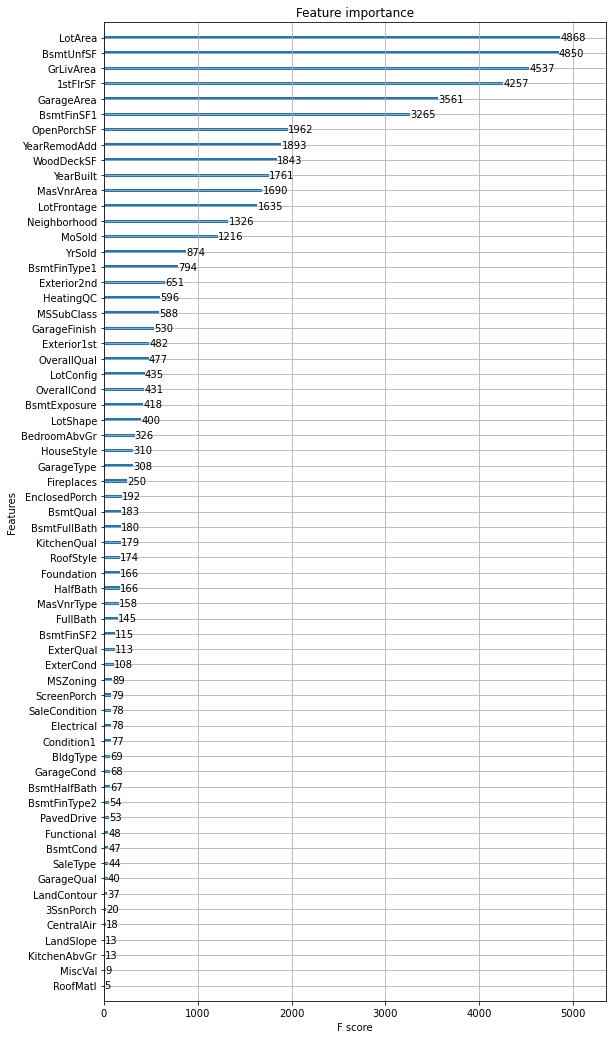

In [42]:
# plot feature importance using built-in function

def plot_feat_imp(train_x, train_y):
    import xgboost
    from xgboost import XGBClassifier
    from xgboost import plot_importance

    model = XGBClassifier()
    model.fit(train_x, train_y)
    
    model.feature_names = train_x.columns.tolist()
    plt.rcParams["figure.figsize"] = (9, 18)
    xgboost.plot_importance(model)
    plt.show()

plot_feat_imp(train_x, train_y)

In [43]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(train_x, train_y)
model.feature_names = train_x.columns.tolist()
model.feature_names

[03:31:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'YearBuiltAgo',
 'MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDriv

In [44]:
train_x.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

# <font color='blue'>5. Build multivariate linear regression model on train dataset using the important features identified in above step

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [46]:
model.fit(train_x, train_y)
print("intercept: ",model.intercept_)
print("coeff: ",model.coef_)

intercept:  10.524374660709062
coeff:  [ 1.26307574e-01  4.72348630e-01  5.57977129e-01  3.52242870e-01
  1.36505581e-05  4.05941821e-02  6.60127808e-02  3.91985782e-01
  2.32440857e-01  2.16922603e-01  1.31709022e-01 -7.04126986e-02
  9.55527132e-01  6.51571130e-02 -6.70558778e-03  6.31343798e-02
  4.55220901e-02  7.23684821e-03 -8.24462920e-02  8.18458838e-02
  1.93244281e-01  6.61371108e-02  6.91158969e-02  7.39166873e-02
  4.30903476e-02  1.25423034e-01  3.39159729e-02 -6.26548223e-02
  2.58566123e-03 -8.52376278e-03 -1.84282534e-03  3.72053770e-03
 -1.98987266e-02  2.16783259e-01 -3.30780302e-03 -8.77408957e-03
 -6.64818388e-02 -1.47193108e-03 -8.81306770e-03 -7.36798872e-04
  4.98351052e-03 -8.48629513e-03 -1.68587124e-02 -1.24884953e-03
  1.92558536e-03 -6.65684823e-03 -6.01113597e-03  5.20510705e-03
  1.25588850e-02 -2.90594962e-03  9.87177383e-03  1.55106264e-02
 -9.01179868e-03 -1.07621589e-04 -5.72068408e-03 -2.16486353e-04
  3.72431731e-03 -8.39967049e-03 -1.00905255e-02  6

# <font color='blue'> 6. Capture the training performance of the model using RMSE score

In [47]:
pred_train = model.predict(train_x)

In [48]:
from sklearn import metrics
rmse=np.sqrt(metrics.mean_squared_error(train_y, pred_train))
print('RMES is ', rmse)

RMES is  0.11074665774232699


# <font color='blue'> 7. Print out the coefficient of the features and explain how to interpret the model using top 2 features (features with highest positive / negative coefficient)

In [49]:
model.coef_

array([ 1.26307574e-01,  4.72348630e-01,  5.57977129e-01,  3.52242870e-01,
        1.36505581e-05,  4.05941821e-02,  6.60127808e-02,  3.91985782e-01,
        2.32440857e-01,  2.16922603e-01,  1.31709022e-01, -7.04126986e-02,
        9.55527132e-01,  6.51571130e-02, -6.70558778e-03,  6.31343798e-02,
        4.55220901e-02,  7.23684821e-03, -8.24462920e-02,  8.18458838e-02,
        1.93244281e-01,  6.61371108e-02,  6.91158969e-02,  7.39166873e-02,
        4.30903476e-02,  1.25423034e-01,  3.39159729e-02, -6.26548223e-02,
        2.58566123e-03, -8.52376278e-03, -1.84282534e-03,  3.72053770e-03,
       -1.98987266e-02,  2.16783259e-01, -3.30780302e-03, -8.77408957e-03,
       -6.64818388e-02, -1.47193108e-03, -8.81306770e-03, -7.36798872e-04,
        4.98351052e-03, -8.48629513e-03, -1.68587124e-02, -1.24884953e-03,
        1.92558536e-03, -6.65684823e-03, -6.01113597e-03,  5.20510705e-03,
        1.25588850e-02, -2.90594962e-03,  9.87177383e-03,  1.55106264e-02,
       -9.01179868e-03, -

# <font color='blue'> 8. Build residual plot on train dataset-check if there is any pattern as far as errors are concerned

In [50]:
residuals=train_y-pred_train
residuals

583     0.025563
300     0.059304
932     0.032926
1409    0.009231
828     0.081554
          ...   
1259   -0.100892
1442   -0.112351
1216   -0.212253
399     0.120397
484    -0.026433
Name: SalePrice, Length: 1168, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


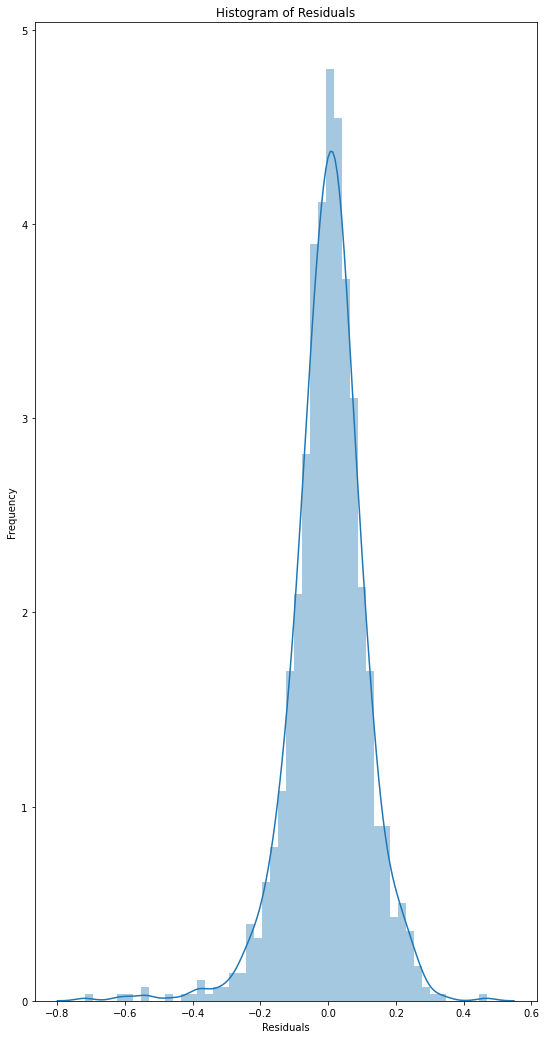

In [51]:
sns.distplot(residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

The majority of data has residual as 0. The distribution is highly right skewed.

Text(0.5, 1.0, 'Residual Error Plot')

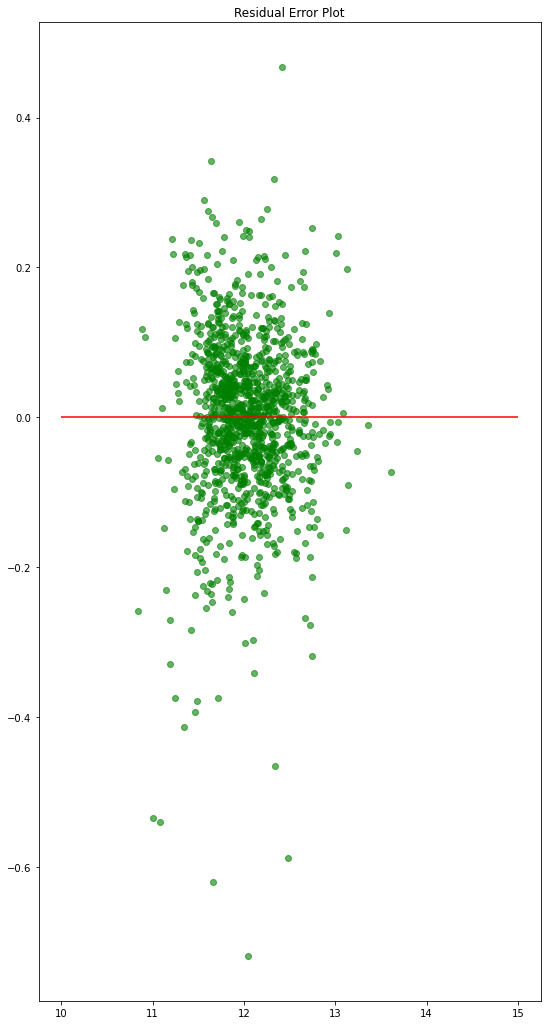

In [52]:
train = plt.scatter(pred_train,residuals, color = 'green', alpha = 0.6)

plt.hlines(y=0, xmin = 10, xmax = 15, color = 'red')


plt.title('Residual Error Plot')

In [53]:
# sns.residplot(pred_train, residuals)

# <font color='blue'> 9. Apply pre-processing and feature transformation on test data (as done on train dataset)

Identify categorical data and numerical data

In [54]:
# find numerical variables
numerical_test = [var for var in test_x.columns if test_x[var].dtype!='O']
print(numerical_test)
print('There are {} numerical variables'.format(len(numerical_test)))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
There are 36 numerical variables


In [55]:
# Find Categorical Variables
categorical_test = [var for var in test_x.columns if test_x[var].dtype=='O']
print(categorical_test)
print('There are {} categorical variables'.format(len(categorical_test)))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
There are 43 categorical variables


In [56]:
test_x.drop(['GarageYrBlt', 'TotalBsmtSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
test_x=test_x.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [58]:
numerical_test = [var for var in test_x.columns if test_x[var].dtype!='O']
print(numerical_test)
print('There are {} numerical variables'.format(len(numerical_test)))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
There are 31 numerical variables


In [59]:
categorical_test = [var for var in test_x.columns if test_x[var].dtype=='O']
print(categorical_test)
print('There are {} categorical variables'.format(len(categorical_test)))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
There are 38 categorical variables


In [60]:
for col in numerical_test:
    if test_x[col].isnull().sum()>0:
        test_x[col].replace(np.nan, test_x[col].median(), inplace=True)
test_x[numerical_test].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
1stFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [61]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test_x[col] = test_x[col].fillna('Missing')
    
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType'):
    test_x[col] = test_x[col].fillna('Missing')

In [62]:
test_x['Electrical']=test_x['Electrical'].fillna(test_x['Electrical'].mode()[0])

In [63]:
test_x.isnull().sum().sum()

0

In [64]:
test_x[test_x.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Variable Transformation**

In [65]:
test_x['MSSubClass'] = test_x['MSSubClass'].astype('object')

In [66]:
# find numerical variables
numerical_test = [var for var in test_x.columns if test_x[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical_test)))
# find categorical variables
categorical_test = [var for var in test_x.columns if test_x[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_test)))

There are 30 numerical variables
There are 39 categorical variables


In [67]:
test_x['YearBuiltAgo'] = now.year - test_x['YearBuilt']
test_x['YearBuiltAgo'].unique()

array([ 14,  18,  49,  17,  50, 101,  73,  44,  15,  38,  96,  46,  67,
        56,  45,  21,  69,  53,  51,  24,  12,  16,  13,  95,  19,  66,
        28,  22,  52,  26,  75, 107, 109,  62,  65,  33,  98,  27,  23,
        54,  55,  80,  20,  29,  63,  68, 108,  90,  37,  71,  48,  87,
        72,  99,  41,  57, 105, 103,  36,  58,  34,  82,  31,  25,  35,
        81, 111,  32, 149,  91, 106,  60,  42, 100,  61,  64,  97,  70,
       139,  92, 123])

In [68]:
test_y = np.log(test_y)

In [69]:
for col in numerical_test:
    test_x[col]=(test_x[col]-test_x[col].min())/(test_x[col].max()-test_x[col].min())
    
test_x[numerical]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
523,0.373288,0.180595,1.000000,0.333333,0.985401,0.966667,0.727794,0.400425,0.000000,0.375856,...,0.623413,0.310448,0.776291,0.000000,0.0,0.00000,0.0,0.0,0.818182,0.25
1236,0.051370,0.005319,0.571429,0.333333,0.956204,0.883333,0.101242,0.000000,0.000000,0.327055,...,0.334274,0.000000,0.051625,0.000000,0.0,0.00000,0.0,0.0,0.454545,1.00
1339,0.339041,0.037749,0.285714,0.666667,0.729927,0.366667,0.000000,0.063785,0.000000,0.215753,...,0.203103,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.454545,0.00
18,0.154110,0.057094,0.285714,0.333333,0.963504,0.900000,0.000000,0.114458,0.000000,0.200342,...,0.406206,0.000000,0.195029,0.000000,0.0,0.00000,0.0,0.0,0.454545,0.50
235,0.000000,0.000884,0.428571,0.000000,0.722628,0.350000,0.576886,0.063430,0.000000,0.053510,...,0.186178,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.636364,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.167808,0.002929,0.428571,0.333333,0.934307,0.833333,0.435530,0.077250,0.000000,0.136986,...,0.310296,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.454545,0.25
1192,0.133562,0.037936,0.285714,0.833333,0.386861,0.733333,0.000000,0.000000,0.000000,0.300514,...,0.176305,0.000000,0.000000,0.344262,0.0,0.00000,0.0,0.0,0.545455,0.25
1243,0.294521,0.058011,1.000000,0.333333,0.978102,0.933333,0.000000,0.245571,0.000000,0.295377,...,0.599436,0.322388,0.437859,0.000000,0.0,0.00000,0.0,0.0,0.727273,0.00
547,0.113014,0.026914,0.285714,0.666667,0.715328,0.333333,0.000000,0.109674,0.000000,0.063784,...,0.440056,0.155224,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.272727,0.25


In [70]:

le = LabelEncoder()

x_enc = test_x[categorical_test].copy()
test_x = test_x.drop(categorical_test, axis = 1)

for cols in categorical_test:
    x_enc[cols] = le.fit_transform(x_enc[cols])
x_enc.head()

test_x = pd.concat([test_x, x_enc], axis = 1)

# <font color='blue'> 10. Capture the performance of the model on test data set using RMSE score

In [71]:
pred_test = model.predict(test_x)

In [72]:
rmse_test=np.sqrt(metrics.mean_squared_error(test_y, pred_test))
print('RMSE is ', rmse_test)

RMSE is  0.40224756852662263


# <font color='blue'> 11. Based on train and test performance, comment on model’s bias and variance prediction error

The RMSE for training data is 0.11, and the RMSE for testing data is 0.4022. 

Both RMSE is between 0 and 1, which infers low bias. 

However, the gap between the training RMSE and the testing RMSE is large, so the variance is high.

In [73]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.evaluate import bias_variance_decomp

# # estimate bias and variance
# mse, bias, var = bias_variance_decomp(model, train_x, train_y, test_x, test_y, loss='mse', num_rounds=200, random_seed=1)

# #mse, bias, var = bias_variance_decomp(lr, train_x,test_x,train_y,test_y, loss='mse', num_rounds=200, random_seed=1)
# # summarize results
# print('MSE: %.3f' % mse)
# print('Bias: %.3f' % bias)
# print('Variance: %.3f' % var) 

 


In [74]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# tx = sc.fit_transform(pd.get_dummies(train_x))

In [75]:
# tx

# <font color='blue'> 12. Can you try and improve RMSE score by iterative process we discussed in today’s sessions?